<a href="https://colab.research.google.com/github/lukipuki0/tarea1-estadistica/blob/main/tarea_ICI3170_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Incorporar el desarrollo del Item junto con los comentarios solicitados en celdas independientes. Siga el ejemplo:
*Codigo; Salida de codigo; comentarios*


# Tarea ICI3170-1

## Integrantes

- Lucas Erazo
- Valentina Guzman
- Jose Villamayor




In [4]:
system("wget https://raw.githubusercontent.com/lukipuki0/tarea1-estadistica/main/BASE_FINAL_SEGPRES_ERTM_DA.xlsx")

##PREGUNTA 1


In [113]:
library(readxl)

# Cargar el archivo Excel
df <- read_excel("BASE_FINAL_SEGPRES_ERTM_DA.xlsx")

# Filtrar las columnas necesarias
df <- df[, c("MUNICIPALIDAD","TIP_SUBDERE", "TOTAL_FUNCIONARIOS_SUMA", "P6.1", "P6.2", "P6.3")]

In [114]:
head(df)

MUNICIPALIDAD,TIP_SUBDERE,TOTAL_FUNCIONARIOS_SUMA,P6.1,P6.2,P6.3
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ALGARROBO,5,209,33,41,8
ALHUE,5,95,15,3,38
ALTO BIOBIO,6,NA,NA,NA,NA
ALTO DEL CARMEN,6,NA,NA,NA,NA
ALTO HOSPICIO,3,500,52,22,213
ANCUD,4,219,60,6,120


In [115]:
# Eliminar filas con cualquier valor NA
data <- na.omit(df)

In [116]:
head(data)

MUNICIPALIDAD,TIP_SUBDERE,TOTAL_FUNCIONARIOS_SUMA,P6.1,P6.2,P6.3
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ALGARROBO,5,209,33,41,8
ALHUE,5,95,15,3,38
ALTO HOSPICIO,3,500,52,22,213
ANCUD,4,219,60,6,120
ANGOL,4,439,82,33,250
ANTOFAGASTA,2,491,276,129,49


## Desarrollo Item 1.a.



In [117]:
# Instala las librerías si no las tienes
install.packages("dplyr")
install.packages("ggplot2")

# Carga las librerías
library(dplyr)
library(ggplot2)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [118]:
# Filtrar los datos de comunas grandes y urbanas
comunas_grandes <- data %>% filter(TIP_SUBDERE %in% c(1, 2))
comunas_urbanas <- data %>% filter(TIP_SUBDERE %in% c(3, 4))

In [119]:
# Calcular promedio de funcionarios en comunas grandes
promedio_grandes <- mean(comunas_grandes$TOTAL_FUNCIONARIOS_SUMA, na.rm = TRUE)

# Calcular promedio de funcionarios en comunas urbanas
promedio_urbanas <- mean(comunas_urbanas$TOTAL_FUNCIONARIOS_SUMA, na.rm = TRUE)

# Mostrar resultados
cat("Promedio de funcionarios en comunas grandes:", promedio_grandes, "\n")
cat("Promedio de funcionarios en comunas urbanas:", promedio_urbanas, "\n")




Promedio de funcionarios en comunas grandes: 750.9211 
Promedio de funcionarios en comunas urbanas: 305.0759 


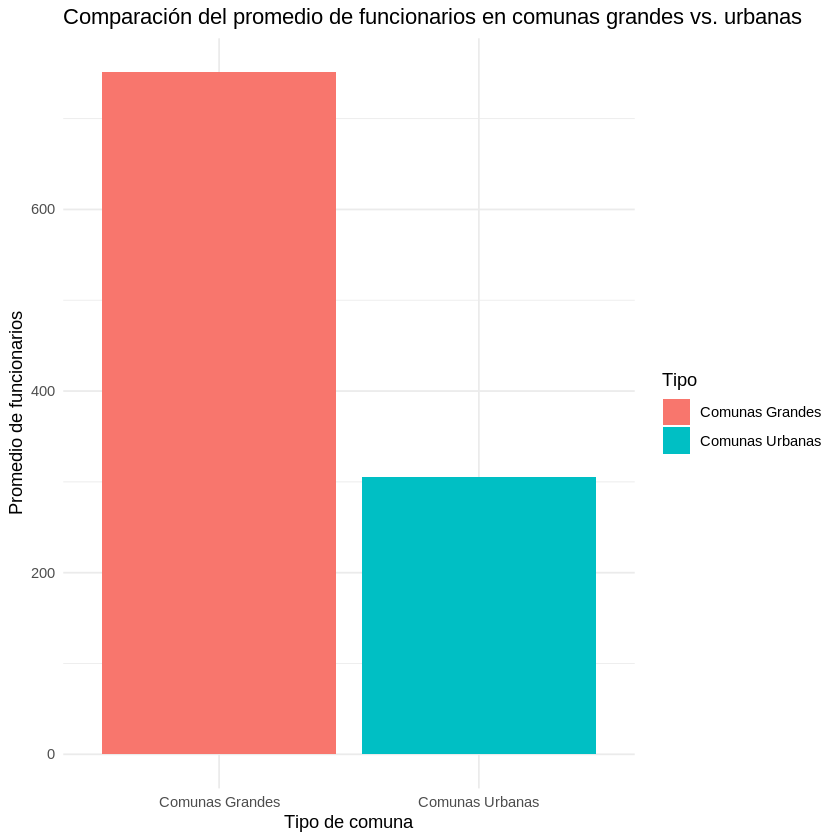

In [120]:
# Crear un dataframe para la visualización
datos_visualizacion <- data.frame(
  Tipo = c("Comunas Grandes", "Comunas Urbanas"),
  Promedio = c(promedio_grandes, promedio_urbanas)
)

# Crear el gráfico de barras
ggplot(datos_visualizacion, aes(x = Tipo, y = Promedio, fill = Tipo)) +
  geom_bar(stat = "identity") +
  ggtitle("Comparación del promedio de funcionarios en comunas grandes vs. urbanas") +
  ylab("Promedio de funcionarios") +
  xlab("Tipo de comuna") +
  theme_minimal()


In [121]:
# Realizar una prueba t para comparar los promedios
t_test_result <- t.test(comunas_grandes$TOTAL_FUNCIONARIOS_SUMA, comunas_urbanas$TOTAL_FUNCIONARIOS_SUMA)

# Mostrar los resultados del t-test
t_test_result



	Welch Two Sample t-test

data:  comunas_grandes$TOTAL_FUNCIONARIOS_SUMA and comunas_urbanas$TOTAL_FUNCIONARIOS_SUMA
t = 4.94, df = 46.755, p-value = 1.041e-05
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 264.2560 627.4342
sample estimates:
mean of x mean of y 
 750.9211  305.0759 


Comentarios:  

La diferencia entre el número promedio de funcionarios en comunas grandes y comunas urbanas es considerable, con las comunas grandes teniendo más del doble de funcionarios que las urbanas. Esto puede justificarse por el hecho de que las comunas grandes suelen tener una mayor población y, por lo tanto, requieren más personal para gestionar la mayor cantidad de servicios y actividades que estas deben proveer.metropolitanas más grandes.

## Desarrollo Item 1.b.

In [122]:
# Filtrar los datos de comunas semiurbanas y rurales
comunas_semiurbanas_rurales <- data %>% filter(TIP_SUBDERE %in% c(5, 6))


In [123]:
# Calcular promedio de funcionarios en comunas semiurbanas y rurales
promedio_semiurbanas_rurales <- mean(comunas_semiurbanas_rurales$TOTAL_FUNCIONARIOS_SUMA, na.rm = TRUE)

# Mostrar resultados
cat("Promedio de funcionarios en comunas grandes:", promedio_grandes, "\n")
cat("Promedio de funcionarios en comunas semiurbanas y rurales:", promedio_semiurbanas_rurales, "\n")



Promedio de funcionarios en comunas grandes: 750.9211 
Promedio de funcionarios en comunas semiurbanas y rurales: 98.87261 


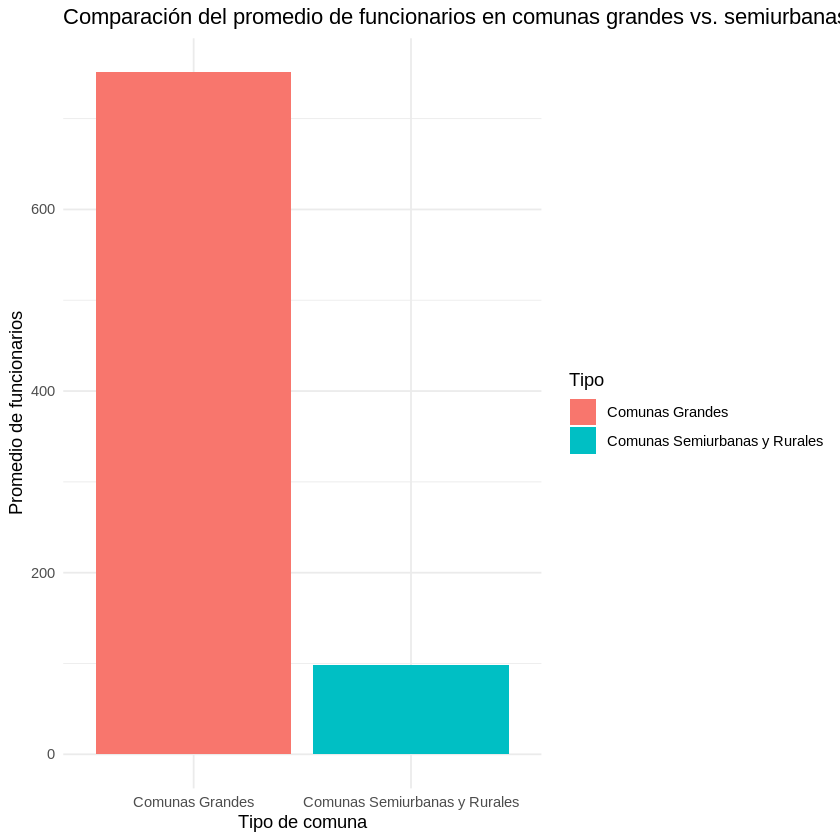

In [124]:
# Crear un dataframe para la visualización
datos_visualizacion_1b <- data.frame(
  Tipo = c("Comunas Grandes", "Comunas Semiurbanas y Rurales"),
  Promedio = c(promedio_grandes, promedio_semiurbanas_rurales)
)

# Crear el gráfico de barras
ggplot(datos_visualizacion_1b, aes(x = Tipo, y = Promedio, fill = Tipo)) +
  geom_bar(stat = "identity") +
  ggtitle("Comparación del promedio de funcionarios en comunas grandes vs. semiurbanas y rurales") +
  ylab("Promedio de funcionarios") +
  xlab("Tipo de comuna") +
  theme_minimal()


In [125]:
# Realizar una prueba t para comparar los promedios
t_test_result_1b <- t.test(comunas_grandes$TOTAL_FUNCIONARIOS_SUMA, comunas_semiurbanas_rurales$TOTAL_FUNCIONARIOS_SUMA)

# Mostrar los resultados del t-test
t_test_result_1b



	Welch Two Sample t-test

data:  comunas_grandes$TOTAL_FUNCIONARIOS_SUMA and comunas_semiurbanas_rurales$TOTAL_FUNCIONARIOS_SUMA
t = 7.6585, df = 37.319, p-value = 3.621e-09
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 479.5873 824.5096
sample estimates:
mean of x mean of y 
750.92105  98.87261 


Comentarios:

La diferencia en este caso es aún más pronunciada, con las comunas grandes teniendo un promedio de funcionarios casi ocho veces mayor que el de las comunas semiurbanas y rurales. Esto es coherente con el hecho de que las comunas semiurbanas y rurales suelen tener menos habitantes y una estructura administrativa más reducida, por lo que requieren menos funcionarios.

## Desarrollo Item 1.c.

In [126]:
# Mostrar Promedios ya calculados
cat("Promedio de funcionarios en comunas urbanas:", promedio_urbanas, "\n")
cat("Promedio de funcionarios en comunas semiurbanas y rurales:", promedio_semiurbanas_rurales, "\n")

Promedio de funcionarios en comunas urbanas: 305.0759 
Promedio de funcionarios en comunas semiurbanas y rurales: 98.87261 


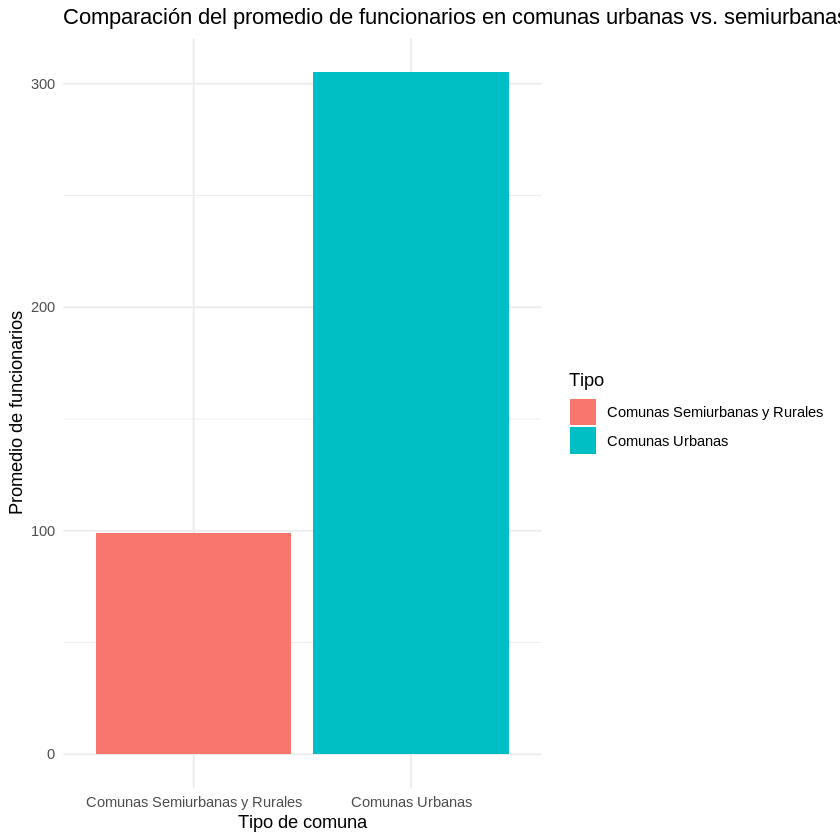

In [127]:
# Crear un dataframe para la visualización
datos_visualizacion_1c <- data.frame(
  Tipo = c("Comunas Urbanas", "Comunas Semiurbanas y Rurales"),
  Promedio = c(promedio_urbanas, promedio_semiurbanas_rurales)
)

# Crear el gráfico de barras
ggplot(datos_visualizacion_1c, aes(x = Tipo, y = Promedio, fill = Tipo)) +
  geom_bar(stat = "identity") +
  ggtitle("Comparación del promedio de funcionarios en comunas urbanas vs. semiurbanas y rurales") +
  ylab("Promedio de funcionarios") +
  xlab("Tipo de comuna") +
  theme_minimal()


Comentarios:

Aunque la diferencia en este caso no es tan grande como en el inciso anterior, las comunas urbanas tienen aproximadamente tres veces más funcionarios que las comunas semiurbanas y rurales.

Conclusión general

En los tres casos, las diferencias en la cantidad de funcionarios son evidentes y significativas. Las comunas grandes, como era de esperarse, requieren significativamente más personal que las urbanas y, especialmente, que las semiurbanas y rurales. Esto refleja el mayor nivel de desarrollo, población y servicios en las comunas grandes y urbanas, en comparación con las semiurbanas y rurales.

##PREGUNTA 2

In [5]:
# Instalar si no tienes las librerías
# install.packages("readxl")
# install.packages("dplyr")

# Cargar librerías
library(readxl)
library(dplyr)

# Cargar los datos del archivo Excel
df <- read_excel("BASE_FINAL_SEGPRES_ERTM_DA.xlsx")





In [6]:
# Filtrar las columnas relevantes para los tramos etarios y TIP_SUBDERE
df <- df %>%
  select(TIP_SUBDERE, P7.1, P7.2, P7.3, P7.4, P7.5)


In [7]:
# Crear la columna Grupo_Municipios basándonos en TIP_SUBDERE
df$Grupo_Municipios <- cut(df$TIP_SUBDERE,
                           breaks = c(0, 2, 4, 6),
                           labels = c("Grandes", "Urbanas", "Semiurbanas_Rurales"))


In [8]:
# Agrupar por grupo de municipios y calcular el promedio por tramo etario
grupo_edades <- df %>%
  group_by(Grupo_Municipios) %>%
  summarise(`18-29` = mean(P7.1, na.rm = TRUE),
            `30-39` = mean(P7.2, na.rm = TRUE),
            `40-49` = mean(P7.3, na.rm = TRUE),
            `50-59` = mean(P7.4, na.rm = TRUE),
            `60+` = mean(P7.5, na.rm = TRUE))

# Mostrar los resultados
print(grupo_edades)


# A tibble: 3 × 6
  Grupo_Municipios    `18-29` `30-39` `40-49` `50-59` `60+`
  <fct>                 <dbl>   <dbl>   <dbl>   <dbl> <dbl>
1 Grandes                60.2   118.    144.    159.   89.9
2 Urbanas                31.4    56.5    57.0    49.7  24.8
3 Semiurbanas_Rurales    14.6    25.7    22.4    17.3   7  


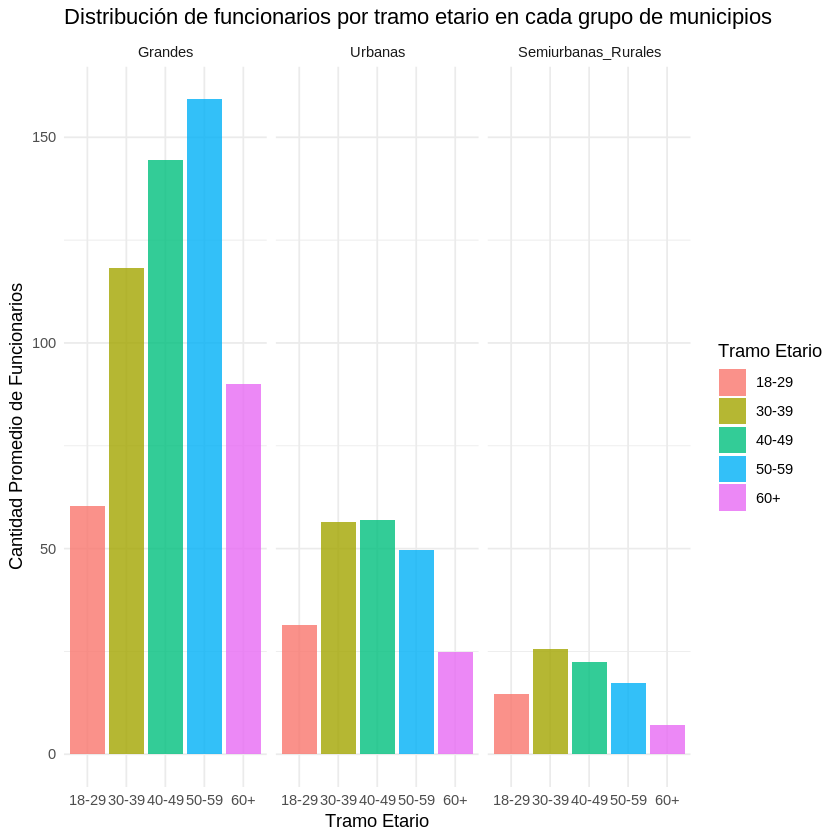

In [17]:
# Crear gráfico de barras por separado para cada grupo de municipios
ggplot(grupo_edades_long, aes(x = Tramo_Etario, y = Cantidad, fill = Tramo_Etario)) +
  geom_bar(stat = "identity", position = "dodge", alpha = 0.8) +
  labs(title = "Distribución de funcionarios por tramo etario en cada grupo de municipios",
       x = "Tramo Etario", y = "Cantidad Promedio de Funcionarios",
       fill = "Tramo Etario") +
  theme_minimal() +
  facet_wrap(~Grupo_Municipios, scales = "fixed")  # Escalas fijas para hacer la comparación más clara



# A: Comunas grandes vs. comunas urbanas

Comparando la distribución de funcionarios por tramo etario entre comunas grandes y comunas urbanas, observamos que:

Comunas grandes tienen una mayor cantidad de funcionarios en todos los tramos etarios en comparación con las comunas urbanas.

El tramo más representado en las comunas grandes es el de 50-59 años con un promedio de 159 funcionarios.

En las comunas urbanas, el tramo más representado es el de 30-39 años con un promedio de 56.5 funcionarios.

#B: Comunas grandes vs. comunas semiurbanas y rurales

En la comparación entre comunas grandes y comunas semiurbanas y rurales:

Comunas grandes nuevamente presentan un mayor número de funcionarios en todos los tramos etarios.

En particular, las comunas grandes tienen un promedio de 159 funcionarios en el tramo de 50-59 años, mientras que las comunas semiurbanas y rurales solo tienen un promedio de 17.3 funcionarios en ese mismo tramo.

El tramo etario menos representado en las comunas semiurbanas y rurales es el de 60+ años con solo 7 funcionarios en promedio.

#C: Comunas urbanas vs. comunas semiurbanas y rurales

Comparando las comunas urbanas con las semiurbanas y rurales:

Las comunas urbanas tienen más funcionarios en todos los tramos etarios en comparación con las comunas semiurbanas y rurales.

En las comunas urbanas, el tramo más representado es el de 30-39 años con un promedio de 56.5 funcionarios, mientras que en las comunas semiurbanas y rurales, este mismo tramo tiene solo 25.7 funcionarios.

El tramo menos representado en ambos tipos de comunas es el de 60+ años.

##PREGUNTA 3


## Desarrollo Item 3.a

In [133]:
library(readxl)
library(dplyr)

# Cargar los datos del archivo Excel
df <- read_excel("BASE_FINAL_SEGPRES_ERTM_DA.xlsx")

# Seleccionar las columnas necesarias
df <- df %>%
  select(TIP_SUBDERE, TOTAL_FUNCIONARIOS_SUMA, P22.1)

# Revisar si hay valores nulos en las columnas seleccionadas
summary(df)

  TIP_SUBDERE    TOTAL_FUNCIONARIOS_SUMA     P22.1       
 Min.   :1.000   Min.   :  14.0          Min.   :   8.0  
 1st Qu.:4.000   1st Qu.:  71.0          1st Qu.:  50.0  
 Median :5.000   Median : 124.0          Median :  84.5  
 Mean   :4.507   Mean   : 256.9          Mean   : 160.4  
 3rd Qu.:6.000   3rd Qu.: 300.0          3rd Qu.: 173.0  
 Max.   :6.000   Max.   :3000.0          Max.   :1629.0  
                 NA's   :48              NA's   :55      

In [134]:
# Eliminar filas con valores nulos en TOTAL_FUNCIONARIOS_SUMA y P22.1
df_clean <- df %>%
  filter(!is.na(TOTAL_FUNCIONARIOS_SUMA), !is.na(P22.1))

# Verificar que se han eliminado correctamente los valores nulos
summary(df_clean)

  TIP_SUBDERE    TOTAL_FUNCIONARIOS_SUMA     P22.1     
 Min.   :1.000   Min.   :  14.0          Min.   :   8  
 1st Qu.:3.000   1st Qu.:  71.0          1st Qu.:  52  
 Median :5.000   Median : 124.0          Median :  85  
 Mean   :4.434   Mean   : 250.7          Mean   : 162  
 3rd Qu.:6.000   3rd Qu.: 289.0          3rd Qu.: 170  
 Max.   :6.000   Max.   :3000.0          Max.   :1629  

In [135]:
# Clasificar los municipios en Grandes y Urbanas
df_clean$Grupo_Municipios <- ifelse(df_clean$TIP_SUBDERE %in% c(1, 2), "Grandes",
                               ifelse(df_clean$TIP_SUBDERE %in% c(3, 4), "Urbanas", NA))

# Filtrar solo las comunas grandes y urbanas
df_comparison <- df_clean %>%
  filter(Grupo_Municipios %in% c("Grandes", "Urbanas"))


In [136]:
# Calcular el ratio de computadores por funcionario
df_comparison$Computadores_por_Funcionario <- df_comparison$P22.1 / df_comparison$TOTAL_FUNCIONARIOS_SUMA

# Calcular el promedio de computadores por funcionario por grupo
computadores_por_grupo <- df_comparison %>%
  group_by(Grupo_Municipios) %>%
  summarise(Promedio_Computadores = mean(Computadores_por_Funcionario, na.rm = TRUE))

print(computadores_por_grupo)

# A tibble: 2 × 2
  Grupo_Municipios Promedio_Computadores
  <chr>                            <dbl>
1 Grandes                          0.712
2 Urbanas                          0.727


In [137]:
# Calcular el total de computadores por grupo de municipios
computadores_totales <- df_comparison %>%
  group_by(Grupo_Municipios) %>%
  summarise(Total_Computadores = sum(P22.1, na.rm = TRUE))

print(computadores_totales)


# A tibble: 2 × 2
  Grupo_Municipios Total_Computadores
  <chr>                         <dbl>
1 Grandes                       19603
2 Urbanas                       15220


In [138]:
# Calcular el total de funcionarios por grupo de municipios
funcionarios_totales <- df_comparison %>%
  group_by(Grupo_Municipios) %>%
  summarise(Total_Funcionarios = sum(TOTAL_FUNCIONARIOS_SUMA, na.rm = TRUE))

# Mostrar el total de computadores y funcionarios juntos
print(funcionarios_totales)


# A tibble: 2 × 2
  Grupo_Municipios Total_Funcionarios
  <chr>                         <dbl>
1 Grandes                       29887
2 Urbanas                       24171


In [139]:
# Calcular el total de funcionarios por grupo de municipios
funcionarios_totales <- df_comparison %>%
  group_by(Grupo_Municipios) %>%
  summarise(Total_Funcionarios = sum(TOTAL_FUNCIONARIOS_SUMA, na.rm = TRUE))

# Mostrar el total de computadores y funcionarios juntos
print(funcionarios_totales)


# A tibble: 2 × 2
  Grupo_Municipios Total_Funcionarios
  <chr>                         <dbl>
1 Grandes                       29887
2 Urbanas                       24171


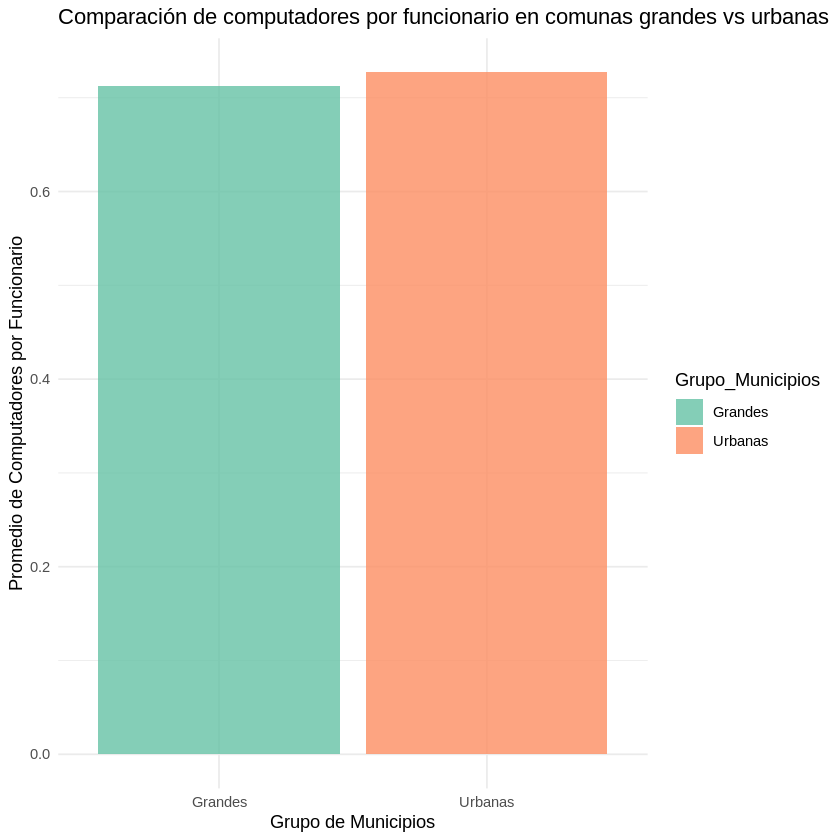

In [140]:
# Crear gráfico de barras comparando las comunas grandes y urbanas
library(ggplot2)

ggplot(computadores_por_grupo, aes(x = Grupo_Municipios, y = Promedio_Computadores, fill = Grupo_Municipios)) +
  geom_bar(stat = "identity", position = "dodge", alpha = 0.8) +
  labs(title = "Comparación de computadores por funcionario en comunas grandes vs urbanas",
       x = "Grupo de Municipios", y = "Promedio de Computadores por Funcionario") +
  theme_minimal() +
  scale_fill_brewer(palette = "Set2")


**Comunas Grandes:** Aunque se esperaría que las comunas grandes, al tener más recursos, tengan una mayor disponibilidad de computadores por funcionario. El promedio de computadores por funcionario en comunas grandes es muy similar al de las comunas urbanas.

**Comunas Urbanas:** Las comunas urbanas, aunque tienen menos recursos en términos absolutos, parecen haber logrado un nivel de equipamiento tecnológico similar al de las comunas grandes, al menos en cuanto a la proporción de computadores disponibles para sus funcionarios.

# Desarrollo Item 3.b

In [141]:
# Clasificar los municipios en Urbanas y Semiurbanas/Rurales
df_clean$Grupo_Municipios <- ifelse(df_clean$TIP_SUBDERE %in% c(3, 4), "Urbanas",
                               ifelse(df_clean$TIP_SUBDERE %in% c(5, 6), "Semiurbanas_Rurales", NA))

# Filtrar solo las comunas urbanas y semiurbanas/rurales
df_comparison_3b <- df_clean %>%
  filter(Grupo_Municipios %in% c("Urbanas", "Semiurbanas_Rurales"))

In [142]:
# Calcular el total de computadores por grupo de municipios (Urbanas vs Semiurbanas/Rurales)
computadores_totales_3b <- df_comparison_3b %>%
  group_by(Grupo_Municipios) %>%
  summarise(Total_Computadores = sum(P22.1, na.rm = TRUE))

# Mostrar el total de computadores
print(computadores_totales_3b)


# A tibble: 2 × 2
  Grupo_Municipios    Total_Computadores
  <chr>                            <dbl>
1 Semiurbanas_Rurales              10708
2 Urbanas                          15220


In [143]:
# Calcular el total de funcionarios por grupo de municipios (Urbanas vs Semiurbanas/Rurales)
funcionarios_totales_3b <- df_comparison_3b %>%
  group_by(Grupo_Municipios) %>%
  summarise(Total_Funcionarios = sum(TOTAL_FUNCIONARIOS_SUMA, na.rm = TRUE))

# Mostrar el total de funcionarios
print(funcionarios_totales_3b)


# A tibble: 2 × 2
  Grupo_Municipios    Total_Funcionarios
  <chr>                            <dbl>
1 Semiurbanas_Rurales              16401
2 Urbanas                          24171


In [144]:
# Calcular el ratio de computadores por funcionario
df_comparison_3b$Computadores_por_Funcionario <- df_comparison_3b$P22.1 / df_comparison_3b$TOTAL_FUNCIONARIOS_SUMA

# Calcular el promedio de computadores por funcionario por grupo
computadores_por_grupo_3b <- df_comparison_3b %>%
  group_by(Grupo_Municipios) %>%
  summarise(Promedio_Computadores = mean(Computadores_por_Funcionario, na.rm = TRUE))

print(computadores_por_grupo_3b)


# A tibble: 2 × 2
  Grupo_Municipios    Promedio_Computadores
  <chr>                               <dbl>
1 Semiurbanas_Rurales                 0.790
2 Urbanas                             0.727


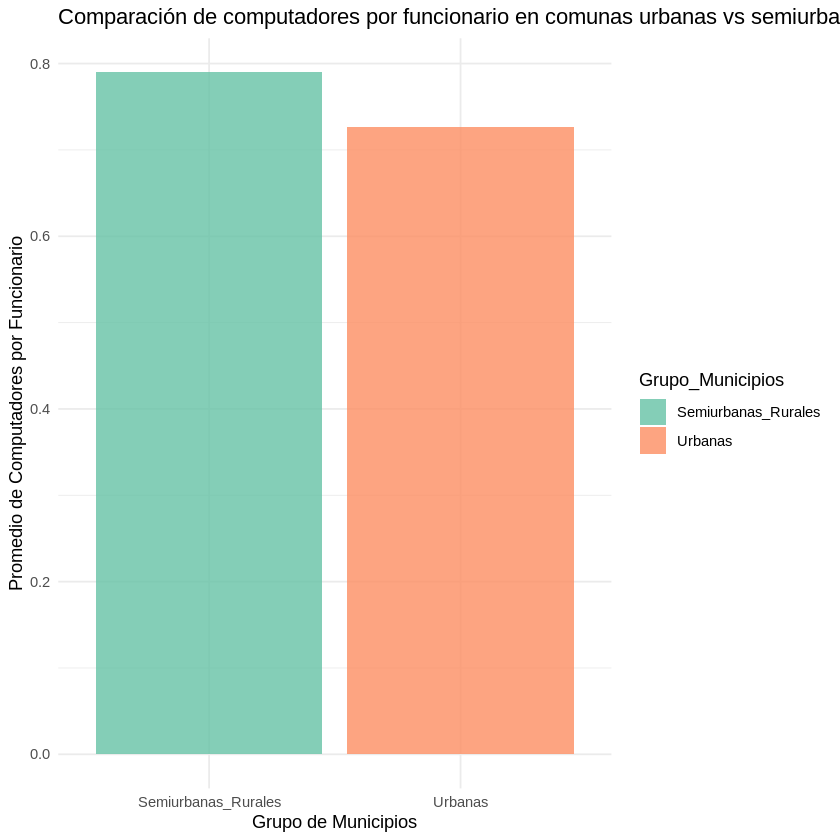

In [145]:
library(ggplot2)

# Crear gráfico de barras mostrando el promedio de computadores por funcionario
ggplot(computadores_por_grupo_3b, aes(x = Grupo_Municipios, y = Promedio_Computadores, fill = Grupo_Municipios)) +
  geom_bar(stat = "identity", position = "dodge", alpha = 0.8) +
  labs(title = "Comparación de computadores por funcionario en comunas urbanas vs semiurbanas/rurales",
       x = "Grupo de Municipios", y = "Promedio de Computadores por Funcionario") +
  theme_minimal() +
  scale_fill_brewer(palette = "Set2")

**Comunas Semiurbanas/Rurales:** Sorprendentemente, estas comunas tienen un promedio mayor de computadores por funcionario . Esto podría indicar que, aunque las comunas semiurbanas y rurales tienen menos computadores en términos absolutos, también cuentan con menos funcionarios, lo que eleva el promedio de computadores por empleado.

**Comunas Urbanas:** A pesar de que las comunas urbanas suelen tener más recursos tecnológicos en general, su promedio de computadores por funcionario es ligeramente inferior. Esto podría explicarse por una mayor cantidad de funcionarios en relación con el número de computadores disponibles, lo que genera un menor promedio.

# Item 3.c

In [146]:
# Clasificar los municipios en Grandes y Semiurbanas/Rurales
df_clean$Grupo_Municipios <- ifelse(df_clean$TIP_SUBDERE %in% c(1, 2), "Grandes",
                               ifelse(df_clean$TIP_SUBDERE %in% c(5, 6), "Semiurbanas_Rurales", NA))

# Filtrar solo las comunas grandes y semiurbanas/rurales
df_comparison_3c <- df_clean %>%
  filter(Grupo_Municipios %in% c("Grandes", "Semiurbanas_Rurales"))

# Calcular el total de computadores por grupo de municipios (Grandes vs Semiurbanas/Rurales)
computadores_totales_3c <- df_comparison_3c %>%
  group_by(Grupo_Municipios) %>%
  summarise(Total_Computadores = sum(P22.1, na.rm = TRUE))

# Mostrar el total de computadores
print(computadores_totales_3c)

# A tibble: 2 × 2
  Grupo_Municipios    Total_Computadores
  <chr>                            <dbl>
1 Grandes                          19603
2 Semiurbanas_Rurales              10708


In [147]:
# Calcular el total de funcionarios por grupo de municipios (Grandes vs Semiurbanas/Rurales)
funcionarios_totales_3c <- df_comparison_3c %>%
  group_by(Grupo_Municipios) %>%
  summarise(Total_Funcionarios = sum(TOTAL_FUNCIONARIOS_SUMA, na.rm = TRUE))

# Mostrar el total de funcionarios
print(funcionarios_totales_3c)


# A tibble: 2 × 2
  Grupo_Municipios    Total_Funcionarios
  <chr>                            <dbl>
1 Grandes                          29887
2 Semiurbanas_Rurales              16401


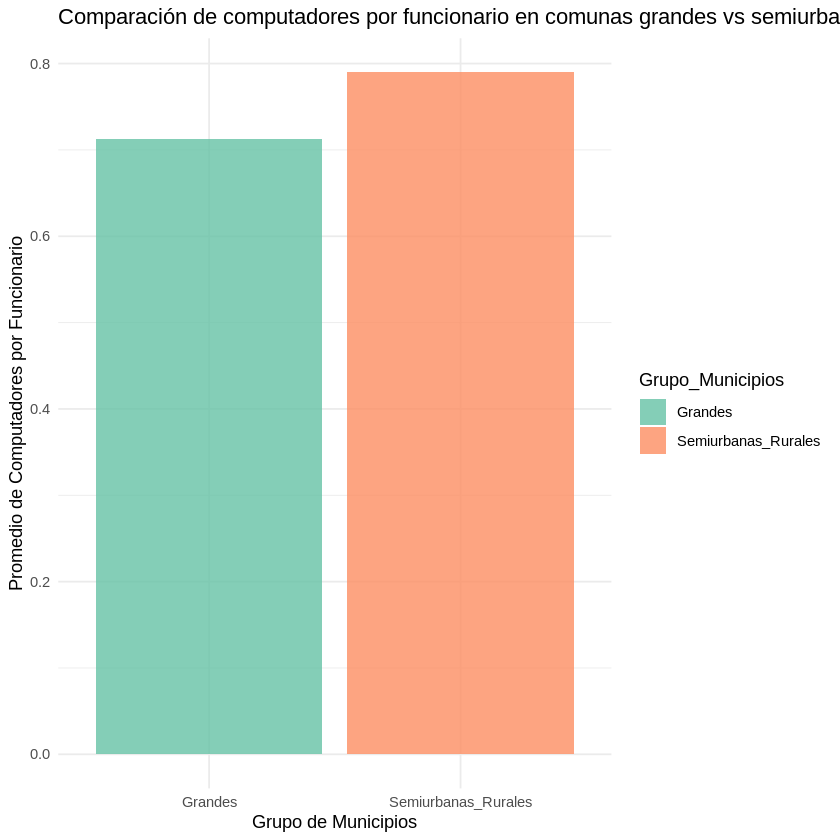

In [148]:
# Calcular el promedio de computadores por funcionario
df_comparison_3c$Computadores_por_Funcionario <- df_comparison_3c$P22.1 / df_comparison_3c$TOTAL_FUNCIONARIOS_SUMA

# Calcular el promedio de computadores por funcionario por grupo
computadores_por_grupo_3c <- df_comparison_3c %>%
  group_by(Grupo_Municipios) %>%
  summarise(Promedio_Computadores = mean(Computadores_por_Funcionario, na.rm = TRUE))

# Visualización del promedio de computadores por funcionario
ggplot(computadores_por_grupo_3c, aes(x = Grupo_Municipios, y = Promedio_Computadores, fill = Grupo_Municipios)) +
  geom_bar(stat = "identity", position = "dodge", alpha = 0.8) +
  labs(title = "Comparación de computadores por funcionario en comunas grandes vs semiurbanas/rurales",
       x = "Grupo de Municipios", y = "Promedio de Computadores por Funcionario") +
  theme_minimal() +
  scale_fill_brewer(palette = "Set2")


**Comunas Grandes:** El gráfico indica que su promedio es menor que el de las comunas semiurbanas/rurales. Esto puede deberse a la cantidad significativamente mayor de funcionarios en las comunas grandes, lo que diluye el acceso a computadores por empleado.

**Comunas Semiurbanas/Rurales:** Tienen un promedio más alto de computadores por funcionario. Este fenómeno puede deberse a que hay menos funcionarios en estas comunas, pero un equipamiento tecnológico razonable que les permite tener un acceso más directo a los recursos disponibles.

# Desarrollo pregunta 4

# Item 4.a

In [149]:
# Instalar moments si no lo tienes instalado
#install.packages("moments")
# Instalar moments si no lo tienes instalado
install.packages("moments") # Descomenta esta línea y ejecútala para instalar el paquete

library(moments)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [150]:
# Clasificar los municipios en Grandes y Urbanas
df_clean$Grupo_Municipios <- ifelse(df_clean$TIP_SUBDERE %in% c(1, 2), "Grandes",
                               ifelse(df_clean$TIP_SUBDERE %in% c(3, 4), "Urbanas", NA))

# Filtrar solo las comunas grandes y urbanas
df_comparison_4a <- df_clean %>%
  filter(Grupo_Municipios %in% c("Grandes", "Urbanas"))

# Calcular la asimetría (skewness) de la cantidad de computadores para comunas grandes
skewness_grandes <- skewness(df_comparison_4a$P22.1[df_comparison_4a$Grupo_Municipios == "Grandes"], na.rm = TRUE)

# Calcular la asimetría (skewness) de la cantidad de computadores para comunas urbanas
skewness_urbanas <- skewness(df_comparison_4a$P22.1[df_comparison_4a$Grupo_Municipios == "Urbanas"], na.rm = TRUE)

# Mostrar los resultados
cat("Asimetría en comunas grandes: ", skewness_grandes, "\n")
cat("Asimetría en comunas urbanas: ", skewness_urbanas, "\n")


Asimetría en comunas grandes:  1.684849 
Asimetría en comunas urbanas:  1.313442 


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”
Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_bar()`).”


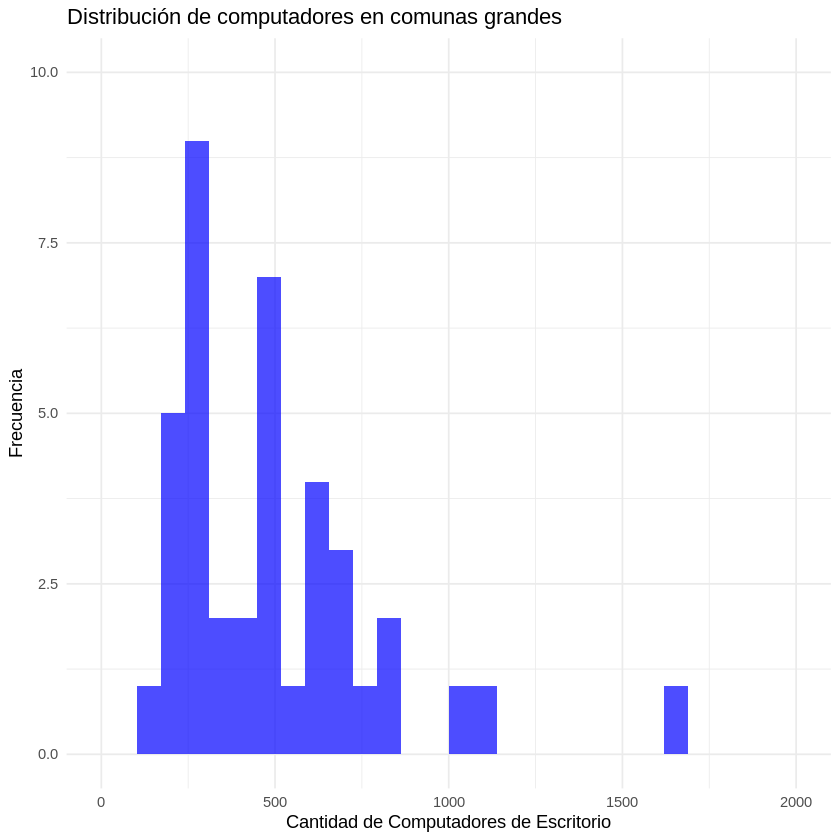

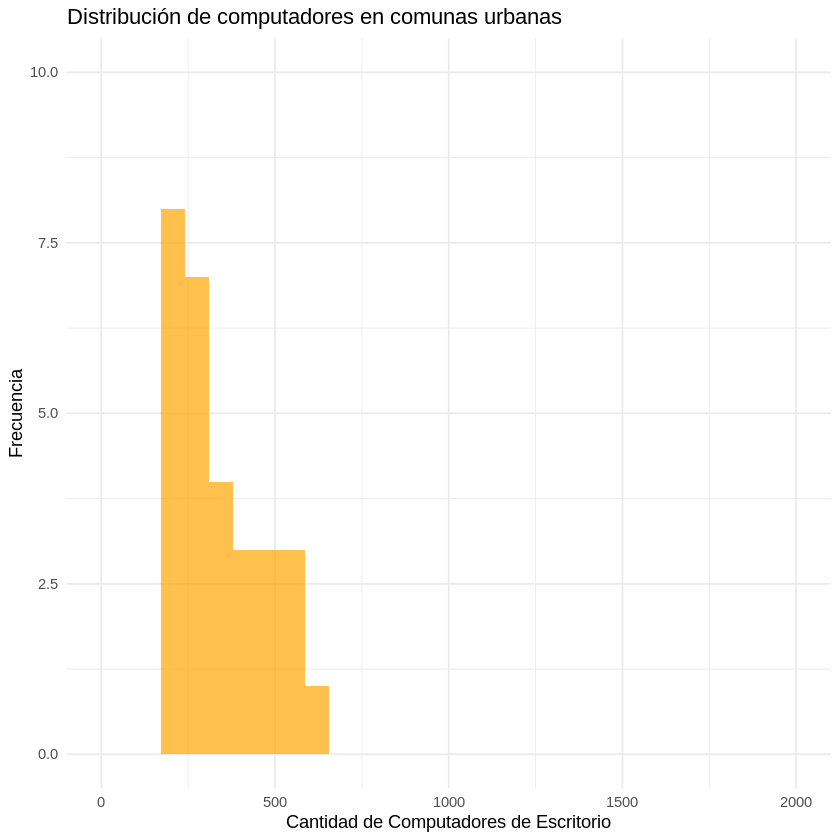

In [151]:
library(ggplot2)

# Crear histograma para comunas grandes con escalas fijas
ggplot(df_comparison_4a[df_comparison_4a$Grupo_Municipios == "Grandes", ], aes(x = P22.1)) +
  geom_histogram(bins = 30, fill = "blue", alpha = 0.7) +
  labs(title = "Distribución de computadores en comunas grandes",
       x = "Cantidad de Computadores de Escritorio", y = "Frecuencia") +
  xlim(0, 2000) +   # Fijar el rango en el eje X
  ylim(0, 10) +     # Fijar el rango en el eje Y
  theme_minimal()

# Crear histograma para comunas urbanas con escalas fijas
ggplot(df_comparison_4a[df_comparison_4a$Grupo_Municipios == "Urbanas", ], aes(x = P22.1)) +
  geom_histogram(bins = 30, fill = "orange", alpha = 0.7) +
  labs(title = "Distribución de computadores en comunas urbanas",
       x = "Cantidad de Computadores de Escritorio", y = "Frecuencia") +
  xlim(0, 2000) +   # Fijar el rango en el eje X
  ylim(0, 10) +     # Fijar el rango en el eje Y
  theme_minimal()


**Comunas Grandes:**

La distribución muestra que la mayoría de las comunas grandes tienen entre 200 y 800 computadores, pero hay un caso extremo donde una comuna tiene alrededor de 1600 computadores, lo que genera una asimetría marcada hacia la derecha.
Esta asimetría es clara, ya que hay muy pocas comunas con una cantidad tan alta de computadores en comparación con la mayoría de las comunas que se agrupan en los valores más bajos.

**Comunas Urbanas:**

En comparación, las comunas urbanas tienen una concentración mucho mayor de municipios con menos de 400 computadores.
El hecho de que no haya comunas urbanas que superen los 500 computadores resalta la diferencia con las comunas grandes, que tienen una mayor dispersión en la cantidad de computadores.

# Item 4.b

In [152]:
# Filtrar las comunas grandes y semiurbanas/rurales
df_clean$Grupo_Municipios <- ifelse(df_clean$TIP_SUBDERE %in% c(1, 2), "Grandes",
                               ifelse(df_clean$TIP_SUBDERE %in% c(5, 6), "Semiurbanas_Rurales", NA))

# Filtrar solo las comunas grandes y semiurbanas/rurales
df_comparison_4b <- df_clean %>%
  filter(Grupo_Municipios %in% c("Grandes", "Semiurbanas_Rurales"))

# Eliminar valores nulos o no válidos en la cantidad de computadores (P22.1)
df_comparison_4b <- df_comparison_4b %>%
  filter(!is.na(P22.1) & P22.1 > 0)

# Verificar el conjunto de datos limpio
summary(df_comparison_4b$P22.1)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    8.0    46.0    70.0   152.3   128.0  1629.0 

In [153]:
# Clasificar los municipios en Grandes y Semiurbanas/Rurales
df_clean$Grupo_Municipios <- ifelse(df_clean$TIP_SUBDERE %in% c(1, 2), "Grandes",
                               ifelse(df_clean$TIP_SUBDERE %in% c(5, 6), "Semiurbanas_Rurales", NA))
# Remover filas que tienen valores NA o no válidos en la columna P22.1 (cantidad de computadores)
df_clean <- df_clean %>%
  filter(!is.na(P22.1) & P22.1 > 0)  # Remover NAs y valores menores o iguales a 0


# Filtrar solo las comunas grandes y semiurbanas/rurales
df_comparison_4b <- df_clean %>%
  filter(Grupo_Municipios %in% c("Grandes", "Semiurbanas_Rurales"))

# Calcular la asimetría (skewness) de la cantidad de computadores para comunas grandes
skewness_grandes_4b <- skewness(df_comparison_4b$P22.1[df_comparison_4b$Grupo_Municipios == "Grandes"], na.rm = TRUE)

# Calcular la asimetría (skewness) de la cantidad de computadores para comunas semiurbanas/rurales
skewness_semiurbanas_rurales <- skewness(df_comparison_4b$P22.1[df_comparison_4b$Grupo_Municipios == "Semiurbanas_Rurales"], na.rm = TRUE)

# Mostrar los resultados
cat("Asimetría en comunas grandes: ", skewness_grandes_4b, "\n")
cat("Asimetría en comunas semiurbanas/rurales: ", skewness_semiurbanas_rurales, "\n")


Asimetría en comunas grandes:  1.684849 
Asimetría en comunas semiurbanas/rurales:  2.018395 


Warning message:
“Removed 3 rows containing non-finite outside the scale range (`stat_bin()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”
Warning message:
“Removed 5 rows containing missing values or values outside the scale range
(`geom_bar()`).”


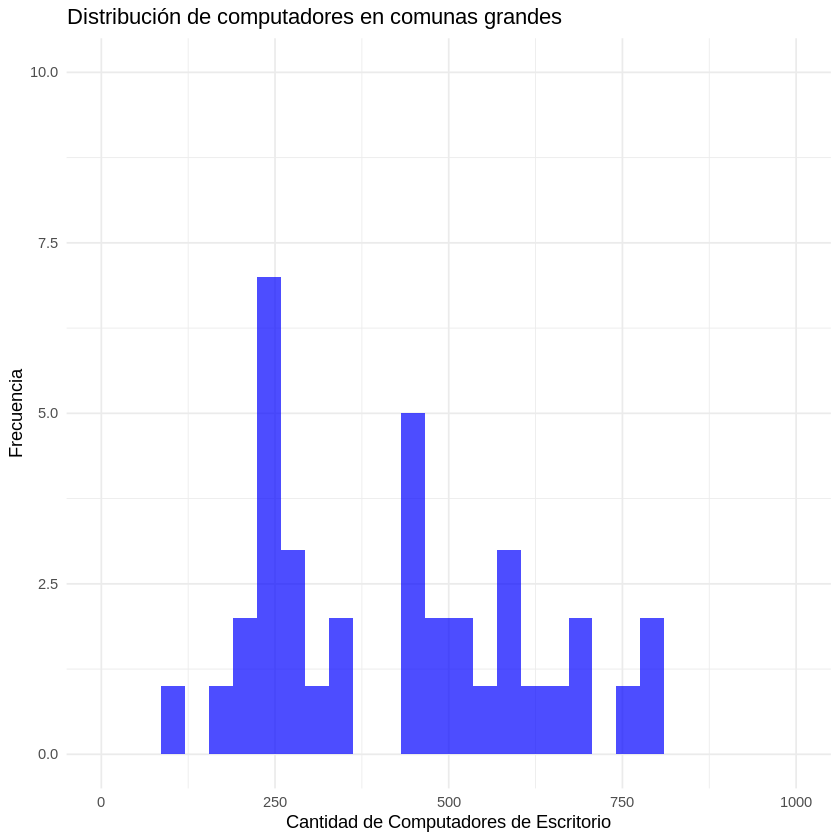

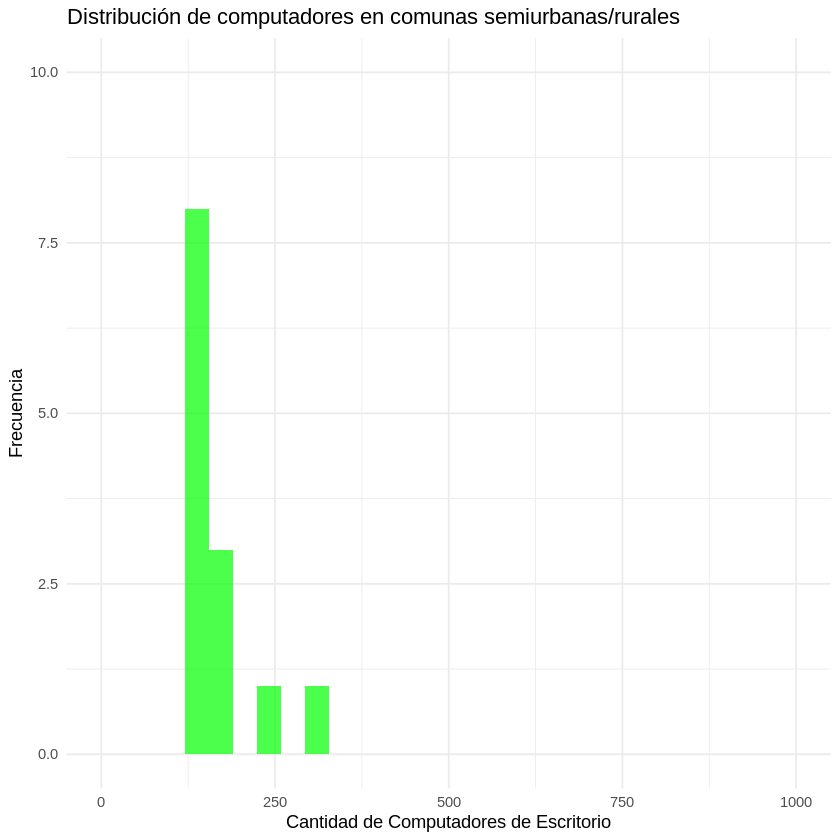

In [154]:
# Crear un histograma para comunas grandes con escalas fijas
ggplot(df_comparison_4b[df_comparison_4b$Grupo_Municipios == "Grandes", ], aes(x = P22.1)) +
  geom_histogram(bins = 30, fill = "blue", alpha = 0.7) +
  labs(title = "Distribución de computadores en comunas grandes",
       x = "Cantidad de Computadores de Escritorio", y = "Frecuencia") +
  xlim(0, 1000) + ylim(0, 10) +  # Fijar las escalas
  theme_minimal()

# Crear un histograma para comunas semiurbanas/rurales con escalas fijas
ggplot(df_comparison_4b[df_comparison_4b$Grupo_Municipios == "Semiurbanas_Rurales", ], aes(x = P22.1)) +
  geom_histogram(bins = 30, fill = "green", alpha = 0.7) +
  labs(title = "Distribución de computadores en comunas semiurbanas/rurales",
       x = "Cantidad de Computadores de Escritorio", y = "Frecuencia") +
  xlim(0, 1000) + ylim(0, 10) +  # Fijar las escalas
  theme_minimal()



**Comunas Grandes:**

 Aunque la mayoría de las comunas tienen entre 200 y 800 computadores, el gráfico presenta varios picos, lo que indica que hay una variedad considerable en la cantidad de computadores entre las distintas comunas grandes.

El gráfico sigue mostrando una asimetría positiva, lo que significa que hay algunas comunas con una cantidad mucho mayor de computadores, pero la mayoría tiene una cantidad menor.

**Comunas Semiurbanas/Rurales:**

En las comunas semiurbanas/rurales, el gráfico muestra una distribución muy concentrada en el rango de menos de 250 computadores. A diferencia de las comunas grandes, aquí no hay mucha dispersión, lo que refleja que la mayoría de las comunas semiurbanas/rurales tienen un número significativamente menor de computadores de escritorio.
Este gráfico destaca la asimetría extrema (2.01) de las comunas semiurbanas/rurales.


# Item 4.c


In [155]:
# Clasificar los municipios en Urbanas y Semiurbanas/Rurales
df_clean$Grupo_Municipios <- ifelse(df_clean$TIP_SUBDERE %in% c(3, 4), "Urbanas",
                               ifelse(df_clean$TIP_SUBDERE %in% c(5, 6), "Semiurbanas_Rurales", NA))

# Filtrar solo las comunas urbanas y semiurbanas/rurales
df_comparison_4c <- df_clean %>%
  filter(Grupo_Municipios %in% c("Urbanas", "Semiurbanas_Rurales"))


In [156]:
# Instalar y cargar moments si no está instalado
# install.packages("moments")
library(moments)

# Calcular la asimetría (skewness) de la cantidad de computadores para comunas urbanas
skewness_urbanas_4c <- skewness(df_comparison_4c$P22.1[df_comparison_4c$Grupo_Municipios == "Urbanas"], na.rm = TRUE)

# Calcular la asimetría (skewness) de la cantidad de computadores para comunas semiurbanas/rurales
skewness_semiurbanas_rurales_4c <- skewness(df_comparison_4c$P22.1[df_comparison_4c$Grupo_Municipios == "Semiurbanas_Rurales"], na.rm = TRUE)

# Mostrar los resultados
cat("Asimetría en comunas urbanas: ", skewness_urbanas_4c, "\n")
cat("Asimetría en comunas semiurbanas/rurales: ", skewness_semiurbanas_rurales_4c, "\n")



Asimetría en comunas urbanas:  1.313442 
Asimetría en comunas semiurbanas/rurales:  2.018395 


Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_bar()`).”
Warning message:
“Removed 6 rows containing missing values or values outside the scale range
(`geom_bar()`).”


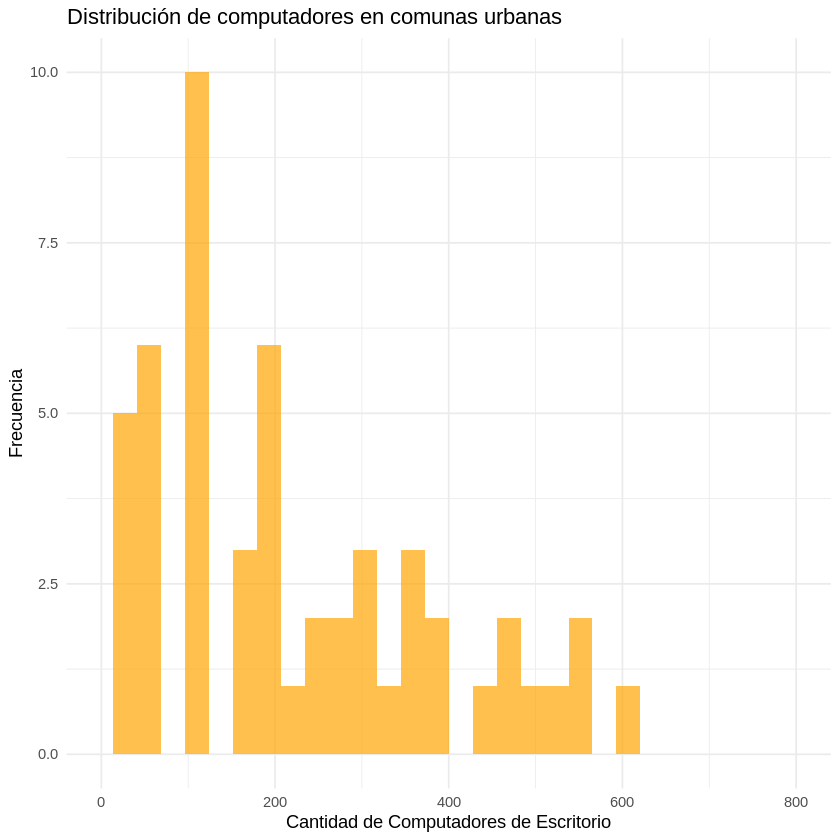

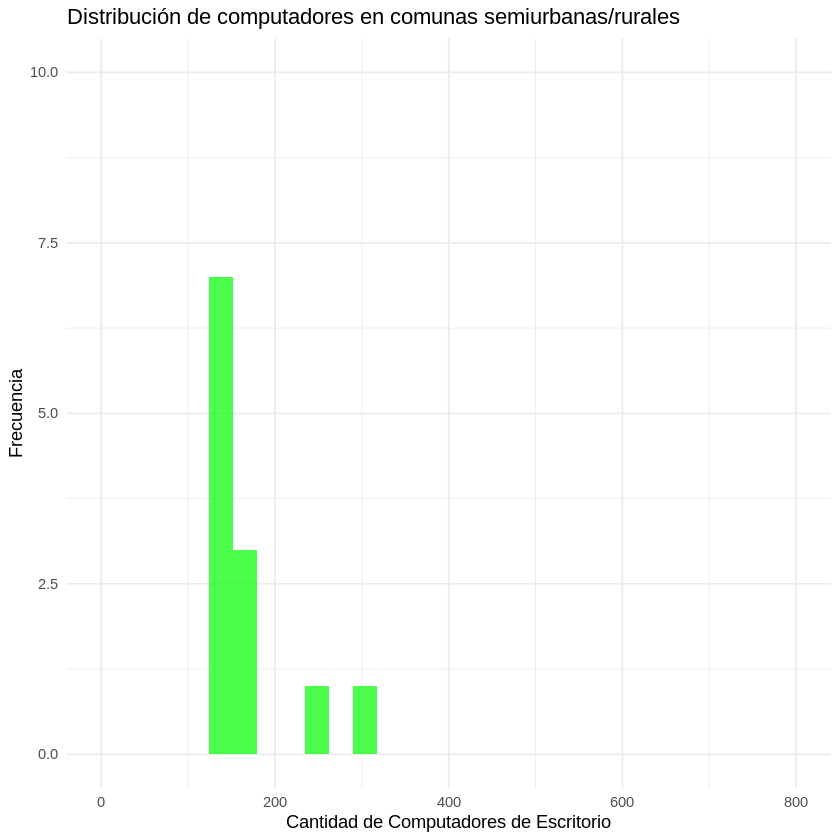

In [157]:
# Crear un histograma para comunas urbanas con escalas fijas
ggplot(df_comparison_4c[df_comparison_4c$Grupo_Municipios == "Urbanas", ], aes(x = P22.1)) +
  geom_histogram(bins = 30, fill = "orange", alpha = 0.7) +
  labs(title = "Distribución de computadores en comunas urbanas",
       x = "Cantidad de Computadores de Escritorio", y = "Frecuencia") +
  xlim(0, 800) + ylim(0, 10) +  # Fijar las escalas
  theme_minimal()

# Crear un histograma para comunas semiurbanas/rurales con escalas fijas
ggplot(df_comparison_4c[df_comparison_4c$Grupo_Municipios == "Semiurbanas_Rurales", ], aes(x = P22.1)) +
  geom_histogram(bins = 30, fill = "green", alpha = 0.7) +
  labs(title = "Distribución de computadores en comunas semiurbanas/rurales",
       x = "Cantidad de Computadores de Escritorio", y = "Frecuencia") +
  xlim(0, 800) + ylim(0, 10) +  # Fijar las escalas
  theme_minimal()


**Comunas Urbanas:**

La distribución de computadores en las comunas urbanas muestra una mayor dispersión en comparación con las comunas semiurbanas/rurales.
El gráfico muestra una asimetría positiva, con más comunas concentradas en los valores bajos, pero con algunas comunas que tienen una cantidad significativamente mayor.
**Comunas Semiurbanas/Rurales:**

En las comunas semiurbanas/rurales, la distribución es mucho más concentrada en la parte baja, con la mayoría de las comunas teniendo menos de 200 computadores.
